**Bioinformatique : Rendu_2** <Br>
Hajar Hajji

## Algorithme 1 : fréquences des nucléotides

In [4]:
def nucleotide_frequency(sequence):
    """
    la proportion de chacune des quatre bases nucléiques
    (A:adénine, C:cytosine, G:guanine et T:thymine) présentes dans une séquence
    """
    nbA,nbC,nbG,nbT=0,0,0,0
    
    for base in sequence:
        if base=="A":
            nbA+=1
        elif base=="C":
            nbC+=1
        elif base=="G":
            nbG+=1
        elif base=="T":
            nbT+=1
    
    nbr_bases=nbA+nbC+nbG+nbT
    if nbr_bases!=0:
        frequence_A=nbA/nbr_bases
        frequence_C=nbC/nbr_bases
        frequence_G=nbG/nbr_bases
        frequence_T=nbT/nbr_bases
    else:
        frequence_A,frequence_C,frequence_G,frequence_T=0,0,0,0
    
    return frequence_A,frequence_C,frequence_G,frequence_T,nbr_bases

In [7]:
def nucleotide_frequency_2(sequence):
    nucleotide_count={"A": 0, "C": 0, "G": 0, "T": 0}
    nbr_total_bases=0
    for nucleotide in sequence:
        if nucleotide in nucleotide_count:
            nucleotide_count[nucleotide]+=1
            nbr_total_bases+=1
            
    for nucleotide in nucleotide_count:
        nucleotide_count[nucleotide]=nucleotide_count[nucleotide]/nbr_total_bases
        
    return nucleotide_count

In [8]:
sequence="ATCGATCGATCGTACG"
print(nucleotide_frequency(sequence))
print(nucleotide_frequency_2(sequence))

(0.25, 0.25, 0.25, 0.25, 16)
{'A': 0.25, 'C': 0.25, 'G': 0.25, 'T': 0.25}


## Algorithme 2 : promenade sur l’ADN

In [124]:
def DNA_walk(sequence, longueur_fenetre, echelle):
    """
    fonction qui retournera les coordonnées de fin des segments sans tracer ces derniers.
    """
    liste_x_fin_segment,liste_y_fin_segment=[0],[0]
    nbA,nbC,nbG,nbT=0,0,0,0
   
    for i in range(0,len(sequence),longueur_fenetre):
        fenetre=sequence[i:i+longueur_fenetre]
        #fréquence de nucléotide dans chaque fenêtre
        for base in fenetre:
            if base=="A":
                nbA+=1
            elif base=="C":
                nbC+=1
            elif base=="G":
                nbG+=1
            elif base=="T":
                nbT+=1
        
        nb_pas_droit=nbC-nbG
        nb_pas_haut=nbA-nbT
        """
        calculer des coordonnées de l’extrémité de chaque segment
        &convertir le nombre de pas en distance en multipliant par l'échelle
        """
        x_fin_segment=nb_pas_droit*echelle
        liste_x_fin_segment.append(x_fin_segment)
        y_fin_segment=nb_pas_haut*echelle
        liste_y_fin_segment.append(y_fin_segment)
            
    return liste_x_fin_segment,liste_y_fin_segment  #les coordonnées de l'extrémité de chaque segment
                                                    #de la marche en zigzag à travers la séquence d'ADN

### Données biologiques

In [125]:
def lecture_sequence(fichier):
    """
    lecture d'une séquence au format FASTA
    """
    f=open(fichier,"r")
    lignes=f.readlines()
    f.close()
    if not lignes[0].startswith(">"):
        print("Erreur de format ! votre fichier n'est pas au format fasta...")
    else:
        liste=[]
        for element in lignes[1:]:
            liste.append(element)
        sequence=''.join(liste).replace("\n", "")
        caracteres=["A","C","G","T","N","a","c","g","t","n","N"]
        tous_caracteres_valides=True
        for ch in sequence:
            if ch not in caracteres:
                print("Votre séquence comprend un caractère inattendu !")
                tous_caracteres_valides=False
        if tous_caracteres_valides:       
            return sequence.upper()

In [133]:
long_fenetre=10000
echelle=1

#manipulation premier fichier : génome de Borrelia burgdorferi
seq1=lecture_sequence("genome_Borrelia_burgdorferi.fasta")
Coord1=DNA_walk(seq1,long_fenetre,echelle)

#manipulation deuxième fichier : génome de Bacillus subtilis 168
seq2=lecture_sequence("genome_Bacillus_subtilis_168.fasta")
Coord2=DNA_walk(seq2,long_fenetre,echelle)

#manipulation troisième fichier : génome d’Escherichia coli K12 MG1655
seq3=lecture_sequence("genome_Escherichia_coli_K12_MG1655.fasta")
Coord3=DNA_walk(seq3,long_fenetre,echelle)

#manipulation quatrième fichier : génome Mycoplasma genitalium5
seq4=lecture_sequence("genome_Mycoplasma_genitalium.fasta")
Coord4=DNA_walk(seq4,long_fenetre,echelle)

### Visualisation

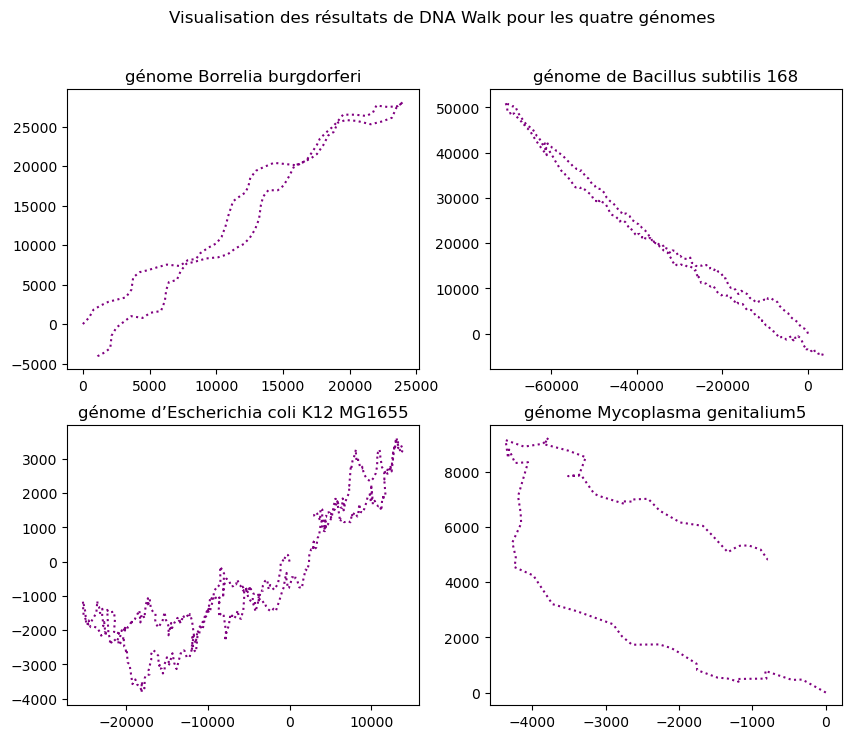

In [162]:
import matplotlib.pyplot as plt

fig,axes=plt.subplots(nrows=2, ncols=2, figsize=(10,8))

x1,y1=Coord1[0],Coord1[1]
axes[0,0].plot(x1,y1,color="purple",linestyle="dotted")
axes[0,0].set_title("génome Borrelia burgdorferi")

x2,y2=Coord2[0],Coord2[1]
axes[0,1].plot(x2,y2,color="purple",linestyle="dotted")
axes[0,1].set_title("génome de Bacillus subtilis 168")

x3,y3=Coord3[0],Coord3[1]
axes[1,0].plot(x3,y3,color="purple",linestyle="dotted")
axes[1,0].set_title("génome d’Escherichia coli K12 MG1655")

x4,y4=Coord4[0],Coord4[1]
axes[1,1].plot(x4,y4,color="purple",linestyle="dotted")
axes[1,1].set_title("génome Mycoplasma genitalium5")

fig.suptitle("Visualisation des résultats de DNA Walk pour les quatre génomes")

plt.show()

## Algorithme 3 : GC skew

In [146]:
def GC_skew(sequence, long_fenetre, chev):
    
    """
    implémentation du biais GC permettant d'identifier les origines de réplication dans les génomes bactériens
    car le biais GC est plus prononcé dans les régions où la réplication commence
    """
    
    # Initialisation des variables
    positions = []
    values_ratio = []
    deb=0
    
    while deb<len(sequence):
        fin=deb+long_fenetre
        if fin>len(sequence):
            fin=len(sequence)
        
        nbG=sequence[deb:fin].count("G")
        nbC=sequence[deb:fin].count("C")
        
        if nbG+nbC > 0: # si 0 alors la fenêtre ne contient aucune base G ni C
            ratio=(nbG - nbC)/(nbG + nbC)
            positions.append(deb)
            values_ratio.append(ratio)
        deb+=long_fenetre-chev
    return positions, values_ratio

In [154]:
def GC_skew_2(sequence, long, chevauchement):
    
    """
    Deuxième implémentation du biais GC
    """
    
    ratios=[]
    positions_fenetres=[]
    
    for i in range(0,len(sequence),chevauchement):
        nbC,nbG=0,0
        fenetre=sequence[i:i+long]
    
        for base in fenetre:
            if base=="C":
                nbC+=1
            elif base=="G":
                nbG+=1
            
        #Calculer le pourcentage de nucléotides G par rapport aux nucléotides C 
        if nbG+nbC > 0:
            ratio=(nbG-nbC)/(nbG+nbC)
            ratios.append(ratio)
            positions_fenetres.append(i)
            
    return positions_fenetres,ratios

### Visualisation

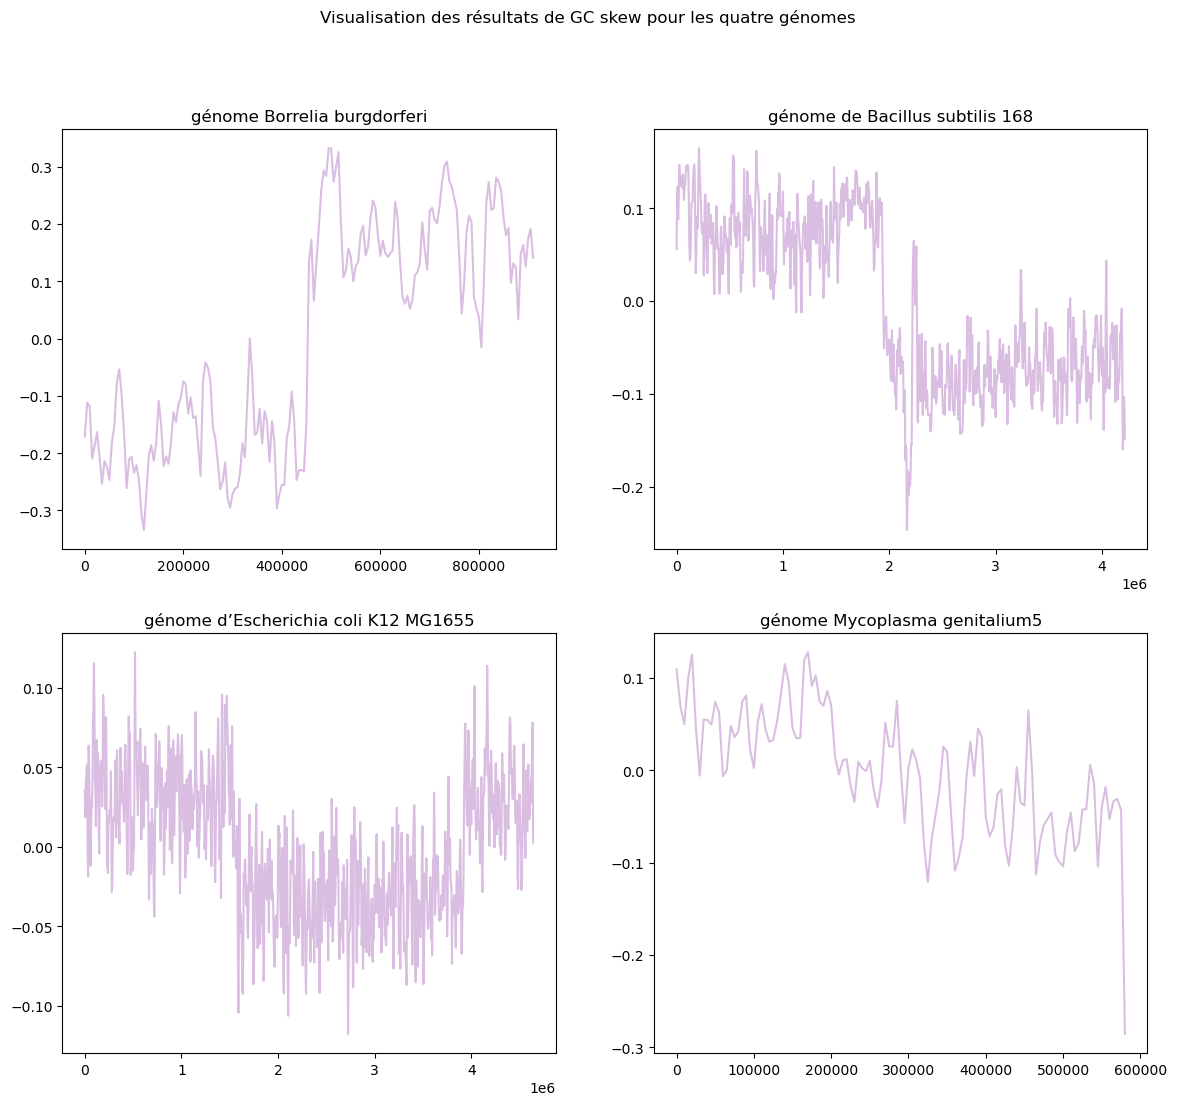

In [172]:
long_fenetre=10000
chev=5000

thiscolor="#DABEE2"
figure,axes=plt.subplots(nrows=2, ncols=2, figsize=(14,12))

x11,y11=GC_skew(seq1, long_fenetre, chev)
axes[0,0].plot(x11,y11,color=thiscolor)
axes[0,0].set_title("génome Borrelia burgdorferi")

x22,y22=GC_skew(seq2, long_fenetre, chev)
axes[0,1].plot(x22,y22,color=thiscolor)
axes[0,1].set_title("génome de Bacillus subtilis 168")

x33,y33=GC_skew(seq3, long_fenetre, chev)
axes[1,0].plot(x33,y33,color=thiscolor)
axes[1,0].set_title("génome d’Escherichia coli K12 MG1655")

x44,y44=GC_skew(seq4, long_fenetre, chev)
axes[1,1].plot(x44,y44,color=thiscolor)
axes[1,1].set_title("génome Mycoplasma genitalium5")

figure.suptitle("Visualisation des résultats de GC skew pour les quatre génomes")

plt.show()

### Vérification des résultats

In [169]:
#l’origine de réplication du génome d’Escherichia coli K12 MG1655 
#source : https://www.ncbi.nlm.nih.gov/nuccore/147034
replication_origine_3=lecture_sequence("replication_origine.fasta")
replication_origine_3

'GGATCCTGGGTATTAAAAAGAAGATCTATTTATTTAGAGATCTGTTCTATTGTGATCTCTTATTAGGATCGCACTGCCCTGTGGATAACAAGGATCCGGCTTTTAAGATCAACAACCTGGAAAGGATCATTAACTGTGAATGATCGGTGATCCTGGACCGTATAAGCTGGGATCAGAATGAGGGGTTATACACAACTCAAAAACTGAACAACAGTTGTTCTTTGGATAACTACCGGTTGATCCAAGCTTCCTGACAGAGTTATCCACAGTAGATCGCACGATCTGTATAC'

In [170]:
def position_un_fragment(seq,fragment):
    if fragment:
        deb=seq.find(fragment) +1
        fin=deb + len(fragment) -1
        return deb,fin
    return 0

In [171]:
#position de la séquence de l’origine de réplication dans le génome
position=position_un_fragment(seq3,replication_origine_3)
position

(3925722, 3926011)

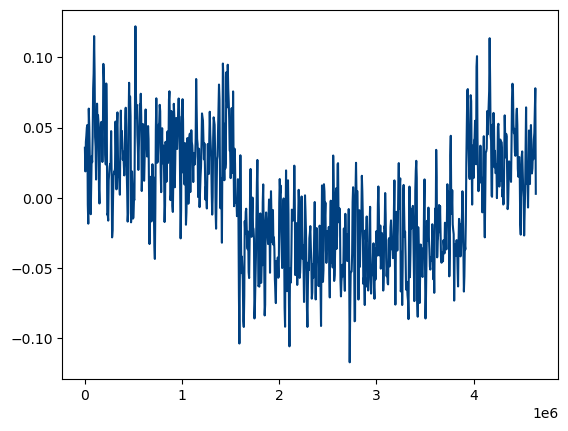

In [175]:
#visualisation de gc skew du génome d’Escherichia coli K12 MG1655
plt.plot(x33,y33,color="#004080")
plt.show()

L'origine de réplication est souvent associée à un changement de signe du biais GC, càd une inversion de la polarité de la courbe. Ceci est dû à l'asymétrie de la réplication qui entraîne une augmentation des nucléotides G et C dans la région de l'origine de réplication. <Br>
On remarque que la position de l'inversion de la polarité (trouvée par l'algorithme de GC skew) correpond approximativement à la valeur théorique récupérée à la partir de la source citée auparavant.

**à refaire pour séquence archée... <Br>
La démarche ne marche pas pour les archées... <Br>
par contre marche bien pour prédire l'origine de réplication chez les bactéries :D**